### Data Research: CoinMarketCap
Research and data analysis using the CoinMarketCap API to obtain different metrics of the best valued cryptocurrencies on the market.

Documentation: https://coinmarketcap.com/api/documentation/v1/

In [106]:
from requests import  Session
from dotenv import load_dotenv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#take enviroment variables from .env file.
load_dotenv()
CMC_PRO_API_KEY = os.getenv('api')

quantity = 1 #int(input("How many crypto do you want to see?"))

base_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
params = {
  'start':'1',
  'limit': str(quantity),
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': CMC_PRO_API_KEY,
}

session = Session()
session.headers.update(headers)
response = session.get(base_url, params=params, headers=headers)

#Variable Declaration using a def
def dataSearcher(data, response, *args):
    if response.status_code == 200:
        for cryptocurrency in data["data"]:
            output_str = ""
            for arg in args:
                if arg == "name":
                    output_str += f"{cryptocurrency['name']} "
                elif arg == "symbol":
                    output_str += f"({cryptocurrency['symbol']}) "
                elif arg == "price":
                    price = cryptocurrency['quote']['USD']['price']
                    # Formatted price for 2 decimal places
                    formatted_price = "{:.2f}".format(float(price))
                    output_str += f"Price: ${formatted_price} "
                elif arg == "market_cap":
                    output_str += f"\nMarket Cap: {cryptocurrency['quote']['USD']['market_cap']} "
                elif arg == "volume_24h":
                    output_str += f"\nVolume 24h: {cryptocurrency['quote']['USD']['volume_24h']} "
                elif arg == "percent_change_24h":
                    output_str += f"\nPercent Change 24h: {cryptocurrency['quote']['USD']['percent_change_24h']} "
            print(output_str, end="\n --------------------------------------\n")
    else:
        print("Status Error")

def dataVisualizer(data, response, *args):
    if response.status_code == 200:
        cryptocurrency_data = [] #List to store Cryptocurrency Data
        for cryptocurrency in data["data"]:
            output_data = {} #Dict to store Cryptocurrency Data
            for arg in args:
                if arg == "name":
                    output_data["Name"] = cryptocurrency['name']
                elif arg == "symbol":
                    output_data["Symbol"] = cryptocurrency['symbol']
                elif arg == "price":
                    price = cryptocurrency['quote']['USD']['price']
                    formatted_price = float("{:.2f}".format(float(price)))
                    output_data["Price"] = formatted_price
                elif arg == "market_cap":
                    output_data["Market Cap"] = cryptocurrency['quote']['USD']['market_cap']
                elif arg == "volume_24h":
                    output_data["Volume 24h"] = cryptocurrency['quote']['USD']['volume_24h']
                elif arg == "percent_change_24h":
                    output_data["Percent Change 24h"] = cryptocurrency['quote']['USD']["percent_change_24h"]
                elif arg == "percent_change_7d":
                    output_data["Percent Change 7 Days"] = cryptocurrency['quote']['USD']["percent_change_7d"]
            cryptocurrency_data.append(output_data) #Adding Cryptocurrency data to the dict
        #Dataframe creation using pandas
        cryptocurrency_df = pd.DataFrame(cryptocurrency_data)
        return cryptocurrency_df
    else:
        print("Status Error")    


### Cryptocurrency Rank

In [86]:
dataSearcher(data, response, "name", "symbol")

Bitcoin (BTC) 
 --------------------------------------
Ethereum (ETH) 
 --------------------------------------
Tether USDt (USDT) 
 --------------------------------------


### Market Capitalization, Negotiation Volume an Price Changes in last 24h.


In [87]:
dataSearcher(data, response, "name", "symbol", "price", "market_cap", "percent_change_24h")

Bitcoin (BTC) Price: $47707.74 
Market Cap: 936233691270.6924 
Percent Change 24h: 0.97239476 
 --------------------------------------
Ethereum (ETH) Price: $2508.40 
Market Cap: 301439436766.8043 
Percent Change 24h: 0.47389799 
 --------------------------------------
Tether USDt (USDT) Price: $1.00 
Market Cap: 96378546862.16599 
Percent Change 24h: -0.01346039 
 --------------------------------------


### Market Capitalization and Percent Change in the last 7 Days

<Axes: xlabel='Percent Change 7 Days', ylabel='Market Cap'>

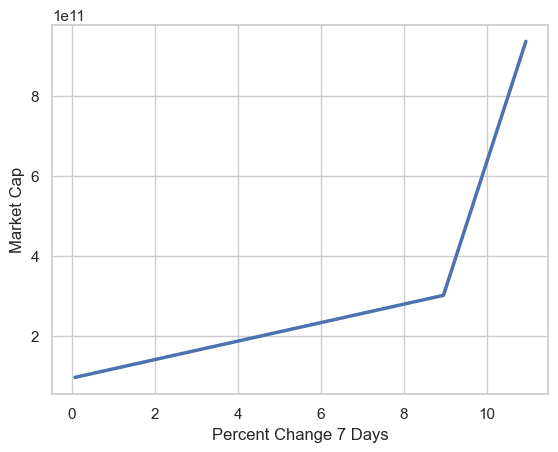

In [100]:
sns.set_theme(style="whitegrid")

crypto_df = dataVisualizer(data, response, "name", "symbol", "price", "market_cap", "percent_change_7d")
sns.lineplot(data=crypto_df, x="Percent Change 7 Days", y="Market Cap", palette="tab10", linewidth=2.5)


### Cryptocurrencies Comparision

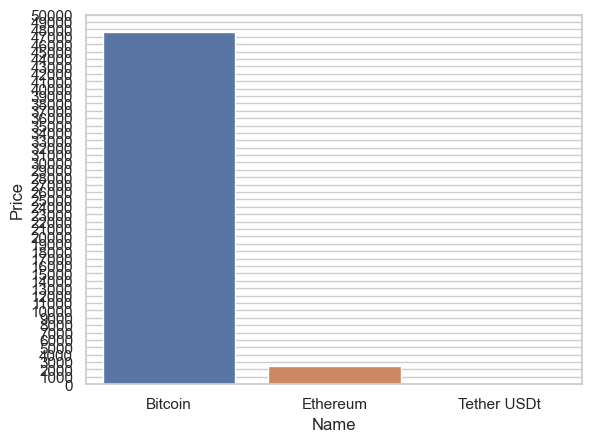

In [133]:
crypto_df = dataVisualizer(data, response, "name", "price")
sns.barplot(data=crypto_df, x="Name", y="Price")
# Ajustar los límites del eje y para que vayan de 0 a 50k con incrementos de 10k
plt.ylim(0, 50000)
plt.yticks(range(0, 50001, 1000))
plt.show()